In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("data/clean_data.csv", low_memory=False)

In [2]:
from datetime import datetime
import time

df = df.iloc[:30000]
# Convert to unix timestamp
df['ts'] = pd.to_datetime(df['ts'], format='%Y-%m-%d %H:%M:%S')
df['ts'] = df['ts'].apply(lambda x: time.mktime(x.timetuple()))
df

,ts,number,pick_lat,pick_lng,drop_lat,drop_lng,geodesic_distance,hour,mins,day,month,year,dayofweek,booking_timestamp,booking_time_diff_hr,booking_time_diff_min
0,1.602295e+09,-1.0,12.975773,77.57107,12.878468,77.445330,17.38,7,34,10,10,2020,5,1602315256,445087,26705254
1,1.602385e+09,-1.0,12.930813,77.60953,12.960320,77.587210,4.06,8,23,11,10,2020,6,1602404622,24,1489
2,1.602398e+09,-1.0,12.960213,77.58746,12.930824,77.609610,4.04,11,57,11,10,2020,6,1602417437,3,213
3,1.602851e+09,-1.0,12.924353,77.54941,12.932216,77.581825,3.62,17,51,16,10,2020,4,1602870667,125,7553
4,1.604029e+09,-1.0,12.945731,77.62250,12.973030,77.616840,3.08,9,0,30,10,2020,4,1604048444,327,19629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.606274e+09,700.0,12.925374,77.60657,12.911764,77.598950,1.72,8,46,25,11,2020,2,1606293976,18,1092
29996,1.606300e+09,700.0,12.911764,77.59895,12.932559,77.609820,2.59,15,54,25,11,2020,2,1606319666,7,428
29997,1.606496e+09,700.0,12.920695,77.65063,12.921767,77.574230,8.29,22,20,27,11,2020,4,1606515610,54,3249
29998,1.606537e+09,700.0,12.921665,77.57436,12.920670,77.650830,8.30,9,41,28,11,2020,5,1606556480,10,658


In [3]:
x = df[["ts", "pick_lat", "pick_lng"]]
y = df['dayofweek']

In [4]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Initialize the SVM model
svm = SVC()

In [5]:
# Fit the model on the training data
svm.fit(x_train, y_train)

SVC()

In [6]:
# Make predictions on the test data
y_pred = svm.predict(x_test)

In [7]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.1708888888888889
Precision: 0.13441356943324864
Recall: 0.1708888888888889
F1 Score: 0.08434139909356647


/home/kakan/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


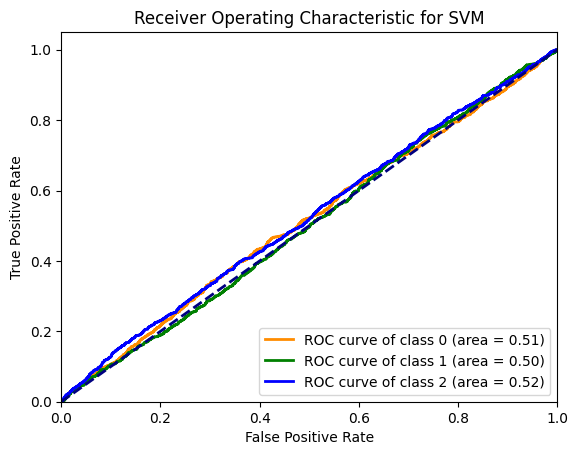

In [14]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Assuming X_train, X_test, y_train, y_test are your training and test sets
# and svm is your trained SVM model
y_score = svm.decision_function(x_test)

classes = ["ts", "pick_lat", "pick_lng"]

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])  # Adjust the classes as per your dataset

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['darkorange', 'green', 'blue']  # Define colors as per the number of classes
for i, color in zip(range(len(classes)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for SVM')
plt.legend(loc="lower right")
plt.show()
